In [19]:
import math
import numpy as np
import json
import pandas as pd
import glob

from src.constants import OUTPUTS_DIR

In [20]:
experiment_file_1 = OUTPUTS_DIR / "train_neural_decoder_block_len_100 copy.json"
experiment_file_2 = OUTPUTS_DIR / "train_neural_decoder_block_len_100_lr_search_2.json"
experiment_file_3 = OUTPUTS_DIR / "train_neural_decoder_block_len_100_long copy.json"
experiment_file_4 = OUTPUTS_DIR / "train_neural_decoder_block_len_100_long_lr_reduce.json"
experiment_file_5 = OUTPUTS_DIR / "train_neural_decoder_long_2.json"
experiment_file_6 = OUTPUTS_DIR / "train_neural_decoder_long_2_cont copy.json"
experiment_file_7 = OUTPUTS_DIR / "train_neural_decoder_long_3.json"
experiment_file_8 = OUTPUTS_DIR / "train_neural_decoder_long_4.json"
experiment_file_9 = OUTPUTS_DIR / "train_neural_decoder_block_len_100_long_new.json"
experiment_file_10 = OUTPUTS_DIR / "train_neural_decoder_block_len_100_long_new_2.json"
experiment_file_11 = OUTPUTS_DIR / "train_neural_decoder_block_len_100_long_new_3.json"
experiment_file_12 = OUTPUTS_DIR / "train_neural_decoder_block_len_100_long_new_2_1.json"


# exp_files = [experiment_file_1, experiment_file_2, experiment_file_4]
# exp_files = [experiment_file_5, experiment_file_6]
exp_files = [experiment_file_7, experiment_file_5, experiment_file_8, ]
# exp_files = [experiment_file_9, experiment_file_10,experiment_file_11, experiment_file_12]

In [21]:
training_runs = []
validation_runs = []
for exp_file in exp_files:
    with open(exp_file, "r") as e:
        results = json.load(e)
    for d in results["data"]:
        if "results" not in d:
            continue
        
        i = 0
        for res in d["results"]:
            if "xe__mean" in res:
                res["type"] = "validation"
                res["step"] = i
            else:
                res["type"] = "training"
                res["step"] = i
                i += 1
        training_results = pd.DataFrame([res for res in d["results"] if res["type"] == "training"])
        validation_results = pd.DataFrame([{**res, "step": (d["results"][i-1]["step"] + 1 if i > 0 else 0)} for i, res in enumerate(d["results"]) if res["type"] == "validation"])
        preambles = pd.DataFrame([{**d["preamble"]["args"], **d["preamble"]}])
        training_results = training_results.merge(preambles, how="cross")
        validation_results = validation_results.merge(preambles, how="cross")
        
        
        training_runs.append(training_results)
        validation_runs.append(validation_results)

training = pd.concat(training_runs, axis=0)
validation = pd.concat(validation_runs, axis=0)

arg_select_cols = ["block_len", "snr_low", "snr_high", "encoder_path", "encoder_type", "argument_hash"]
training_select_cols = ["xe", "ber", "bler", "step", "grad_avg_l2", "grad_avg_linf", "update_avg_l2", "update_avg_linf"]
val_select_cols = ["xe__mean", "ber__mean", "bler__mean", "xe__err", "ber__err", "bler__err", "step", ]

training = training[training_select_cols + arg_select_cols]
validation = validation[val_select_cols + arg_select_cols]

# lr_filter = [0.01]
# training = training[training["adam_lr"].isin(lr_filter)]
# validation = validation[validation["adam_lr"].isin(lr_filter)]

display(training.head())
display(validation.head())

,xe,ber,bler,step,grad_avg_l2,grad_avg_linf,update_avg_l2,update_avg_linf,block_len,snr_low,snr_high,encoder_path,encoder_type,argument_hash
0,0.695503,0.501113,1.0,0,0.051188,0.029185,0.150474,0.000100,100,-1.5,2.0,../models/train_turbo_table_block_len_16_7f7a6...,table,d4c1ef127397a22deaad97dfe3fca2f99b516873
1,0.694594,0.503535,1.0,1,0.047344,0.027072,0.134080,0.000100,100,-1.5,2.0,../models/train_turbo_table_block_len_16_7f7a6...,table,d4c1ef127397a22deaad97dfe3fca2f99b516873
2,0.693140,0.499648,1.0,2,0.035678,0.019164,0.125414,0.000100,100,-1.5,2.0,../models/train_turbo_table_block_len_16_7f7a6...,table,d4c1ef127397a22deaad97dfe3fca2f99b516873
3,0.692065,0.493184,1.0,3,0.029118,0.012519,0.121090,0.000101,100,-1.5,2.0,../models/train_turbo_table_block_len_16_7f7a6...,table,d4c1ef127397a22deaad97dfe3fca2f99b516873
4,0.691617,0.479941,1.0,4,0.030189,0.013898,0.118243,0.000101,100,-1.5,2.0,../models/train_turbo_table_block_len_16_7f7a6...,table,d4c1ef127397a22deaad97dfe3fca2f99b516873


,xe__mean,ber__mean,bler__mean,xe__err,ber__err,bler__err,step,block_len,snr_low,snr_high,encoder_path,encoder_type,argument_hash
0,0.695357,0.499518,1.0,0.000050,0.000440,0.0,0,100,-1.5,2.0,../models/train_turbo_table_block_len_16_7f7a6...,table,d4c1ef127397a22deaad97dfe3fca2f99b516873
1,0.524095,0.255248,1.0,0.000347,0.000393,0.0,200,100,-1.5,2.0,../models/train_turbo_table_block_len_16_7f7a6...,table,d4c1ef127397a22deaad97dfe3fca2f99b516873
2,0.467751,0.213155,1.0,0.000423,0.000426,0.0,400,100,-1.5,2.0,../models/train_turbo_table_block_len_16_7f7a6...,table,d4c1ef127397a22deaad97dfe3fca2f99b516873
3,0.426793,0.190590,1.0,0.000514,0.000445,0.0,600,100,-1.5,2.0,../models/train_turbo_table_block_len_16_7f7a6...,table,d4c1ef127397a22deaad97dfe3fca2f99b516873
4,0.398056,0.171774,1.0,0.000542,0.000450,0.0,800,100,-1.5,2.0,../models/train_turbo_table_block_len_16_7f7a6...,table,d4c1ef127397a22deaad97dfe3fca2f99b516873


139898


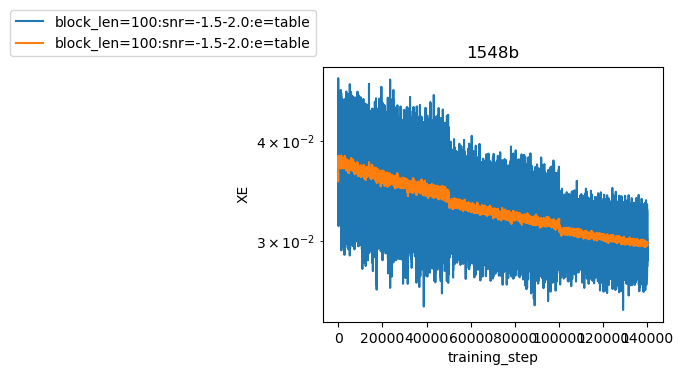

127873


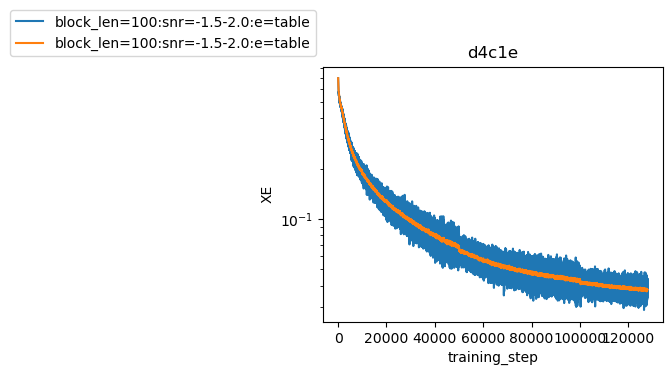

31830


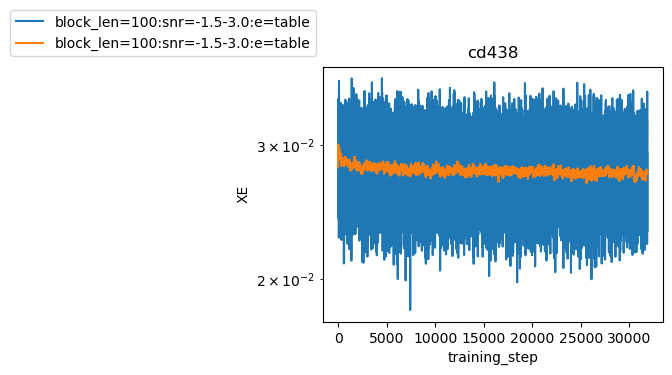

7729


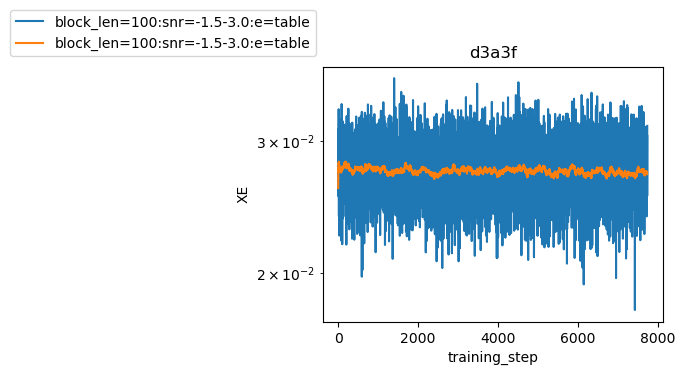

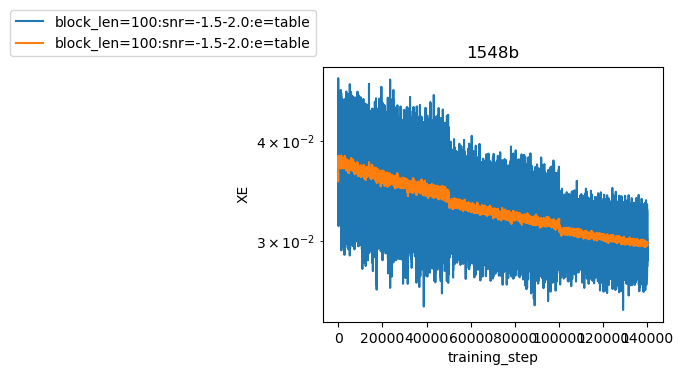

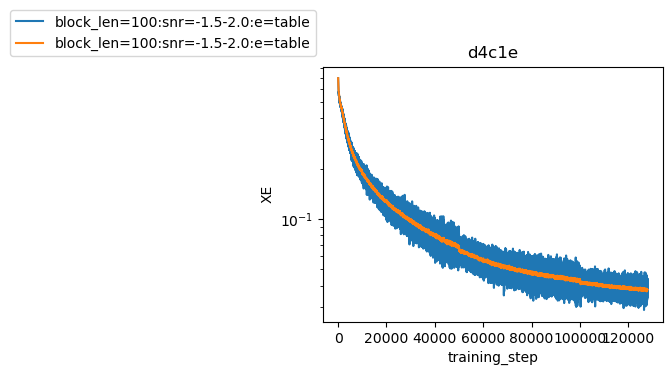

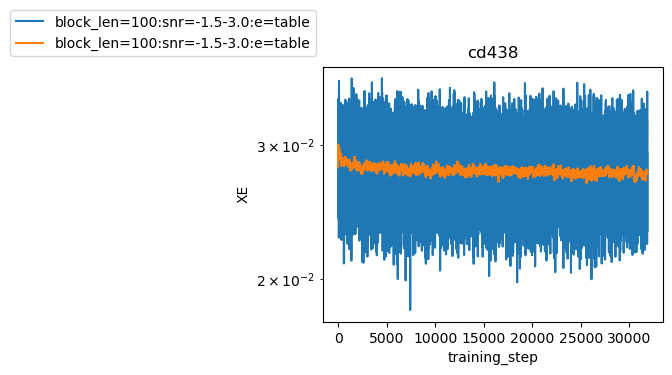

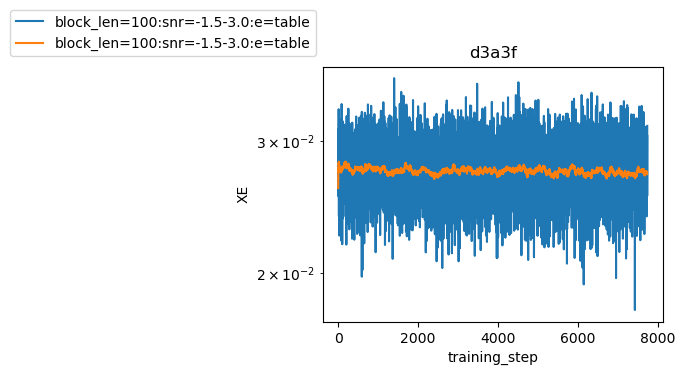

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

for (
    block_len, 
    snr_low, 
    snr_high,
    encoder_path,
    encoder_type, 
    argument_hash
    ), training_result in training.groupby(["block_len", "snr_low", "snr_high", "encoder_path","encoder_type", "argument_hash"]):
    if len(training_result) < 100:
        continue
    print(len(training_result))
    fig = plt.figure(figsize=(4, 3), dpi=100)
    ax = fig.add_axes([0.1, 0.1, .85, .85])  # Last two terms control height and width
    capsize = 2
    
    ax.errorbar(
        training_result["step"], 
        training_result["xe"], 
        # yerr=exp_result["xe__err"], 
        linestyle='-',
        capsize=capsize,
        label=f"block_len={block_len}:snr={snr_low}-{snr_high}:e={encoder_type}"
    )
    ax.errorbar(
        training_result["step"], 
        training_result["xe"].ewm(com=50.0).mean(), 
        # yerr=exp_result["xe__err"], 
        linestyle='-',
        capsize=capsize,
        label=f"block_len={block_len}:snr={snr_low}-{snr_high}:e={encoder_type}"
    )
    ax.legend(bbox_to_anchor=[0.0, 1.25])
    ax.set_yscale('log')
    # ax.set_xscale('log')
    ax.set_xlabel('training_step')
    ax.set_ylabel('XE')
    ax.set_title(argument_hash[:5])

    display(fig)

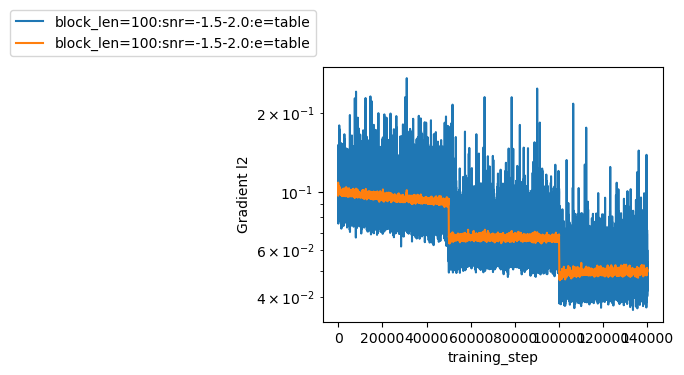

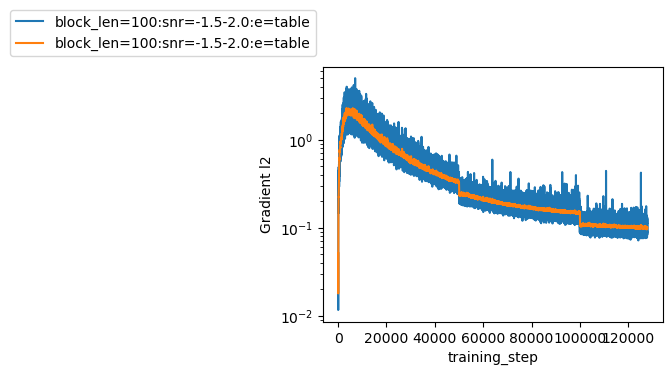

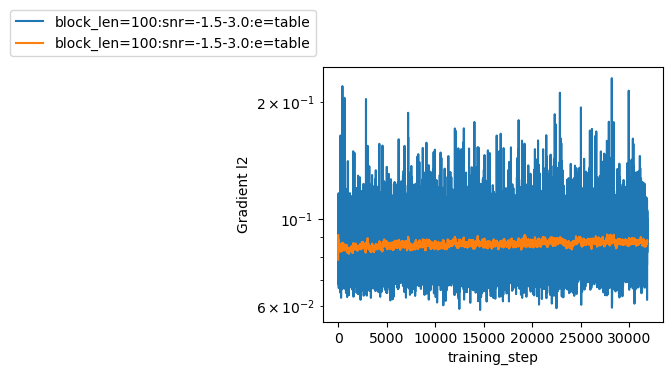

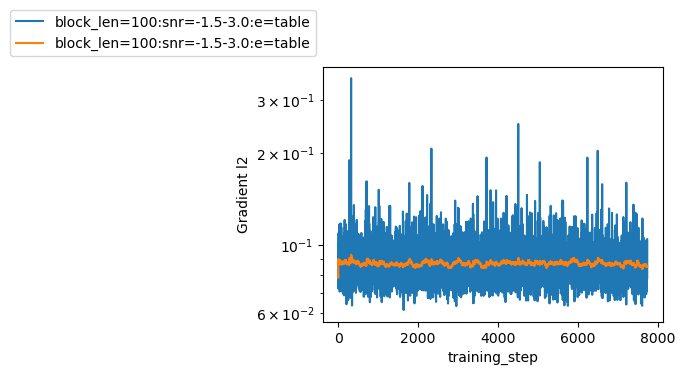

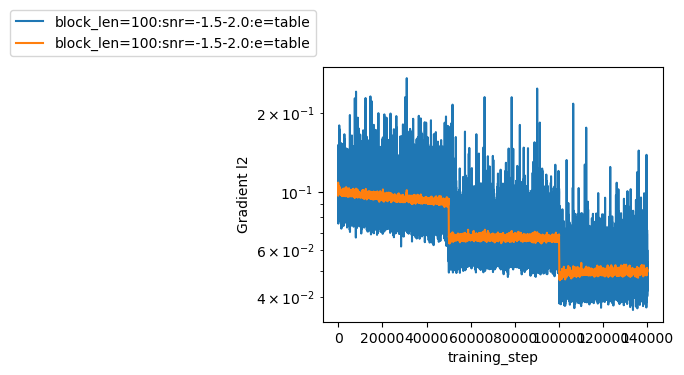

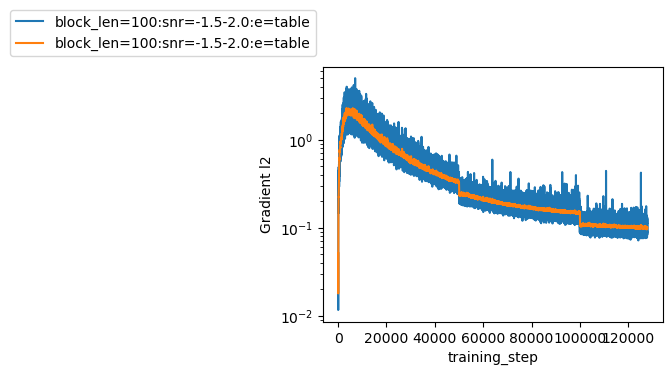

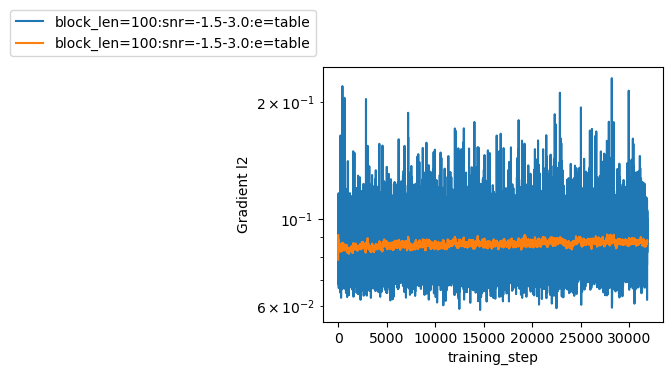

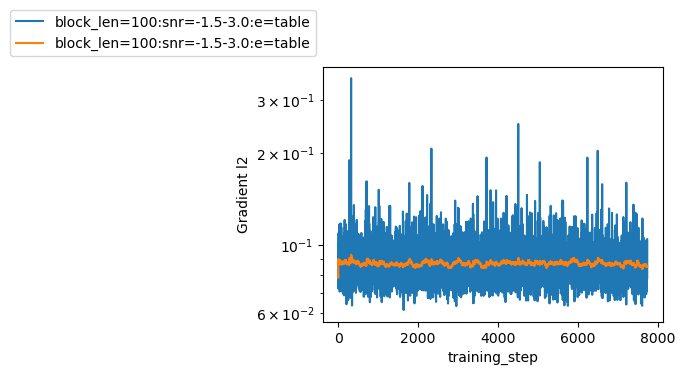

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

for (
    block_len, 
    snr_low, 
    snr_high,
    encoder_path,
    encoder_type, 
    argument_hash
    ), training_result in training.groupby(["block_len", "snr_low", "snr_high", "encoder_path","encoder_type", "argument_hash"]):
    if len(training_result) < 100:
        continue
    
    fig = plt.figure(figsize=(4, 3), dpi=100)
    ax = fig.add_axes([0.1, 0.1, .85, .85])  # Last two terms control height and width
    capsize = 2
    
    ax.errorbar(
        training_result["step"], 
        training_result["grad_avg_l2"], 
        # yerr=exp_result["xe__err"], 
        linestyle='-',
        capsize=capsize,
        label=f"block_len={block_len}:snr={snr_low}-{snr_high}:e={encoder_type}"
    )
    ax.errorbar(
        training_result["step"], 
        training_result["grad_avg_l2"].ewm(com=50.0).mean(), 
        # yerr=exp_result["xe__err"], 
        linestyle='-',
        capsize=capsize,
        label=f"block_len={block_len}:snr={snr_low}-{snr_high}:e={encoder_type}"
    )
    ax.legend(bbox_to_anchor=[0.0, 1.25])
    ax.set_yscale('log')
    # ax.set_xscale('log')
    ax.set_xlabel('training_step')
    ax.set_ylabel('Gradient l2')

    display(fig)

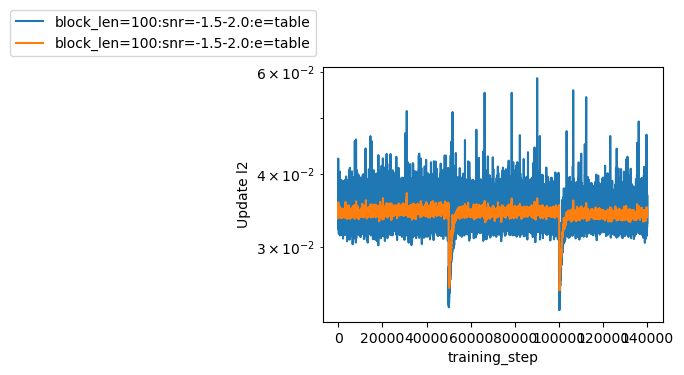

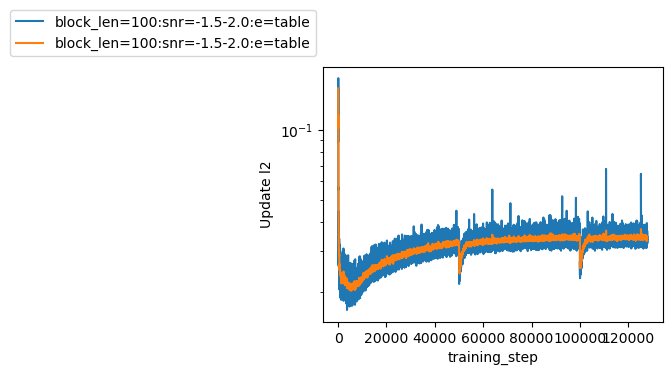

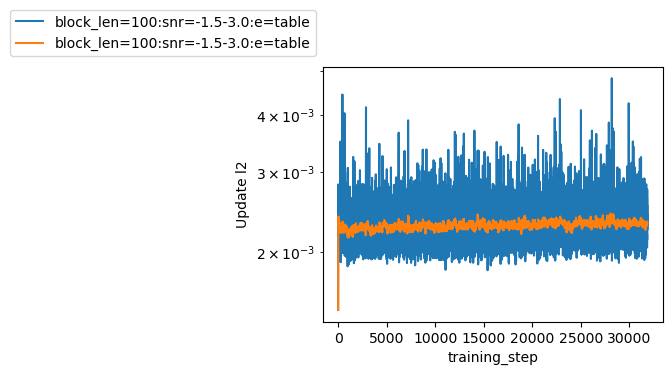

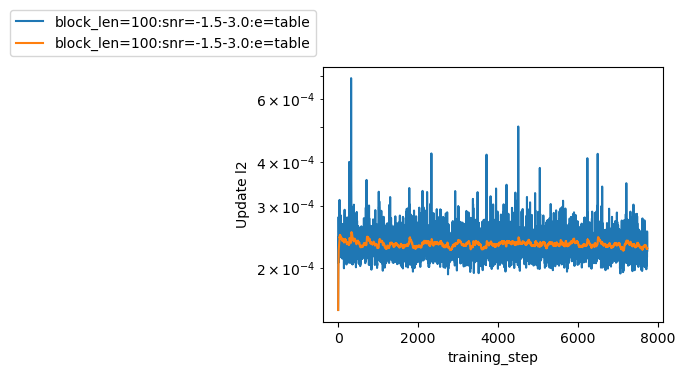

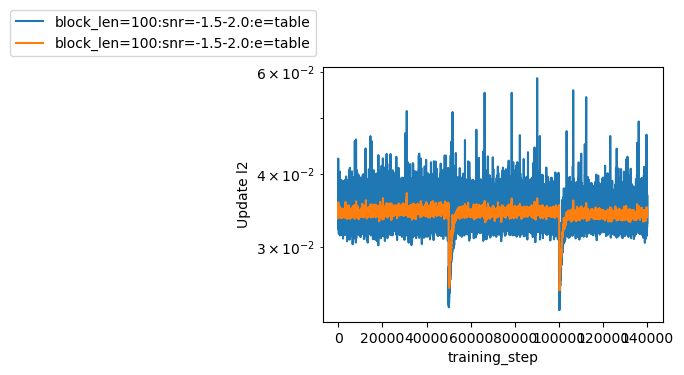

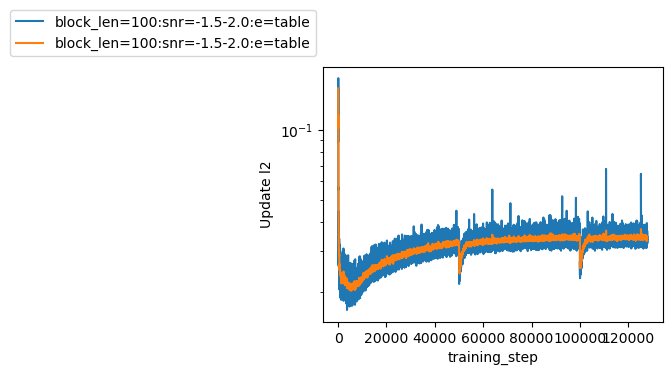

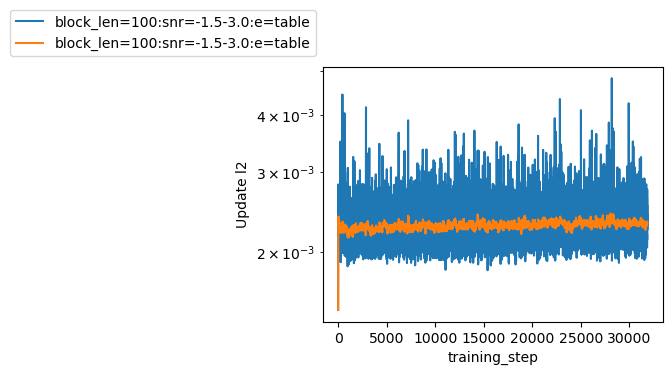

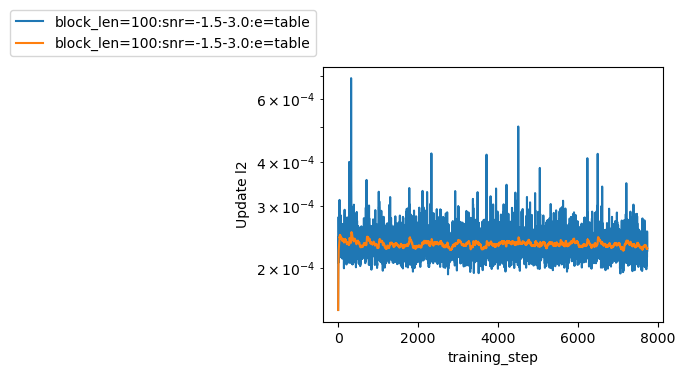

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

for (
    block_len, 
    snr_low, 
    snr_high,
    encoder_path,
    encoder_type, 
    argument_hash
    ), training_result in training.groupby(["block_len", "snr_low", "snr_high", "encoder_path","encoder_type", "argument_hash"]):
    if len(training_result) < 100:
        continue
    
    fig = plt.figure(figsize=(4, 3), dpi=100)
    ax = fig.add_axes([0.1, 0.1, .85, .85])  # Last two terms control height and width
    capsize = 2
    
    ax.errorbar(
        training_result["step"], 
        training_result["update_avg_l2"], 
        # yerr=exp_result["xe__err"], 
        linestyle='-',
        capsize=capsize,
        label=f"block_len={block_len}:snr={snr_low}-{snr_high}:e={encoder_type}"
    )
    ax.errorbar(
        training_result["step"], 
        training_result["update_avg_l2"].ewm(com=50.0).mean(), 
        # yerr=exp_result["xe__err"], 
        linestyle='-',
        capsize=capsize,
        label=f"block_len={block_len}:snr={snr_low}-{snr_high}:e={encoder_type}"
    )
    ax.legend(bbox_to_anchor=[0.0, 1.25])
    ax.set_yscale('log')
    # ax.set_xscale('log')
    ax.set_xlabel('training_step')
    ax.set_ylabel('Update l2')

    display(fig)

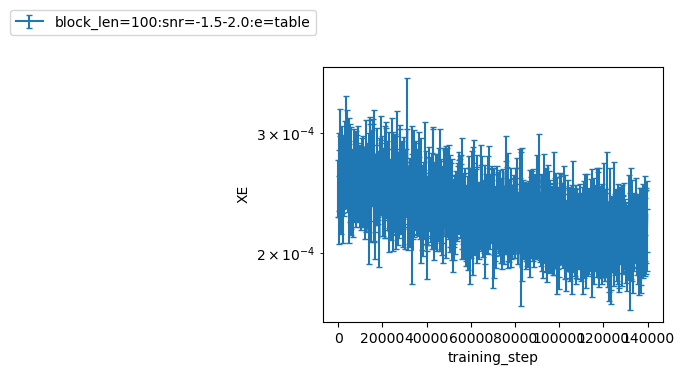

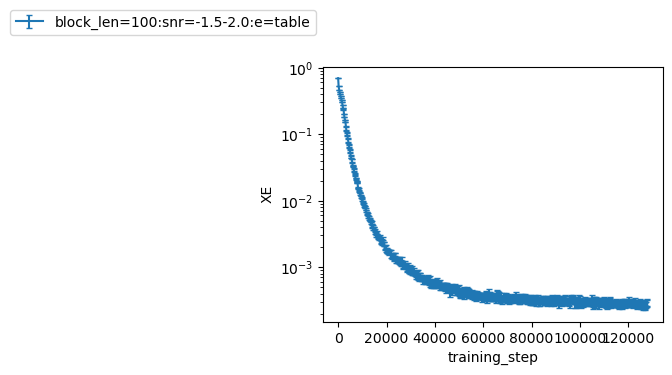

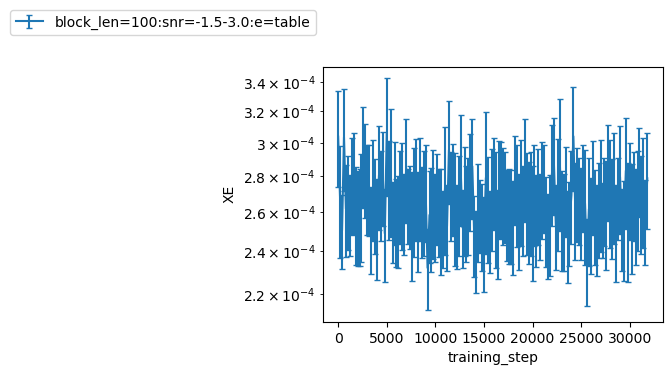

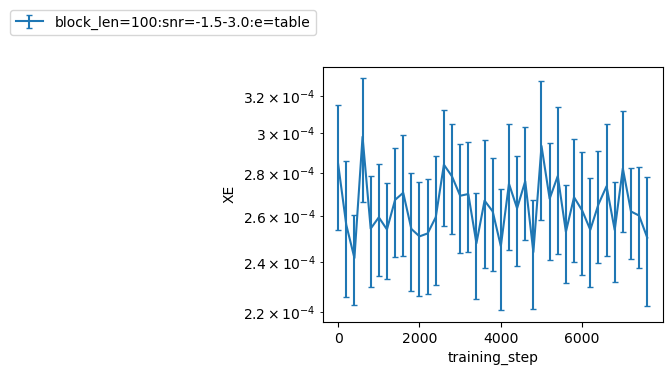

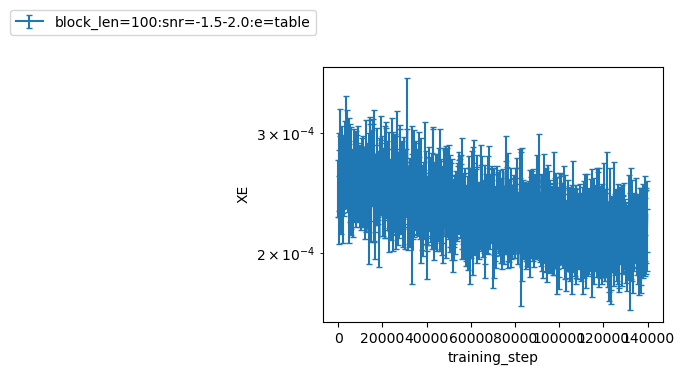

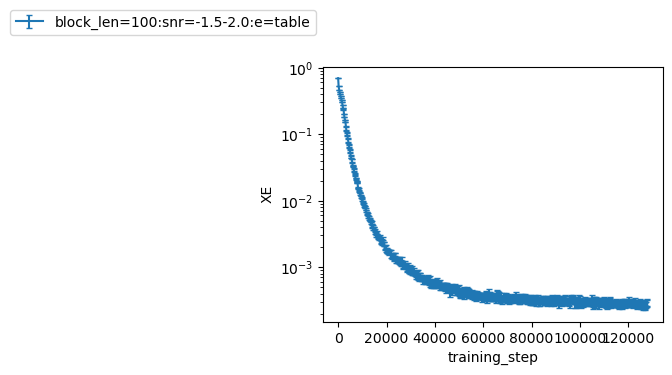

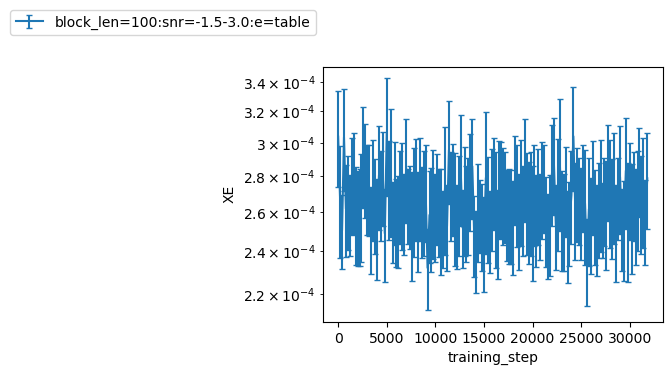

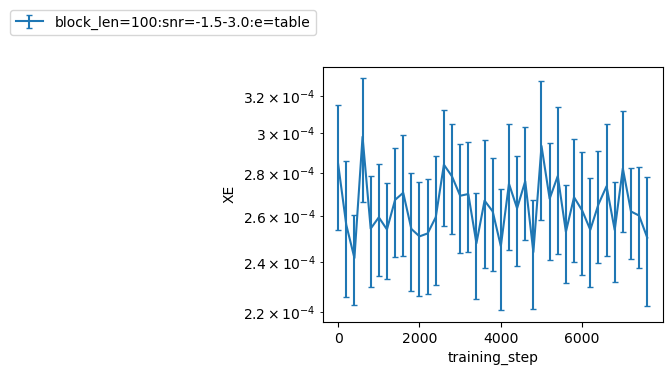

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

for (
    block_len, 
    snr_low, 
    snr_high,
    encoder_path,
    encoder_type, 
    argument_hash
    ), validation_result in validation.groupby(["block_len", "snr_low", "snr_high", "encoder_path","encoder_type", "argument_hash"]):
    fig = plt.figure(figsize=(4, 3), dpi=100)
    ax = fig.add_axes([0.1, 0.1, .85, .85])  # Last two terms control height and width
    capsize = 2
    
    ax.errorbar(
        validation_result["step"], 
        validation_result["xe__mean"], 
        yerr=validation_result["xe__err"], 
        linestyle='-',
        capsize=capsize,
        label=f"block_len={block_len}:snr={snr_low}-{snr_high}:e={encoder_type}"
    )
    ax.legend(bbox_to_anchor=[0.0, 1.25])
    ax.set_yscale('log')
    # ax.set_xscale('log')
    ax.set_xlabel('training_step')
    ax.set_ylabel('XE')

    display(fig)

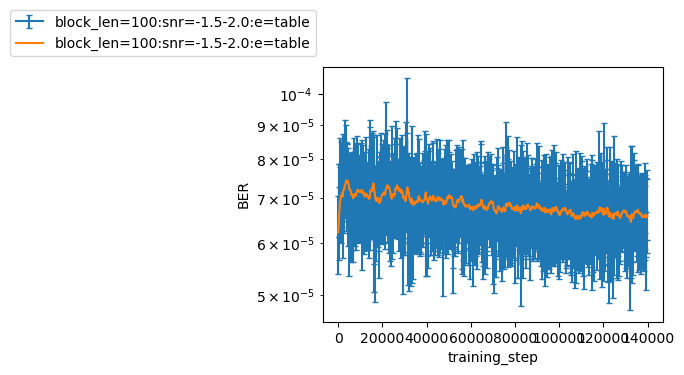

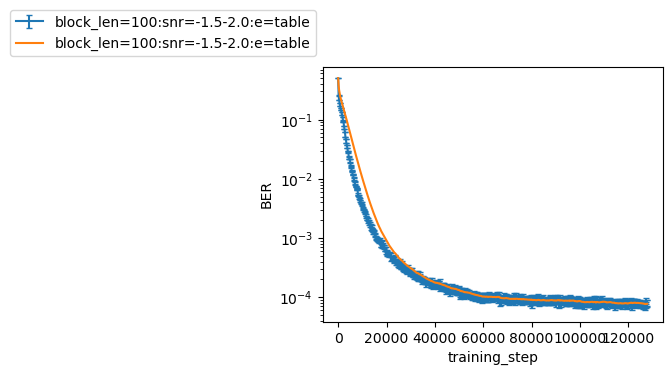

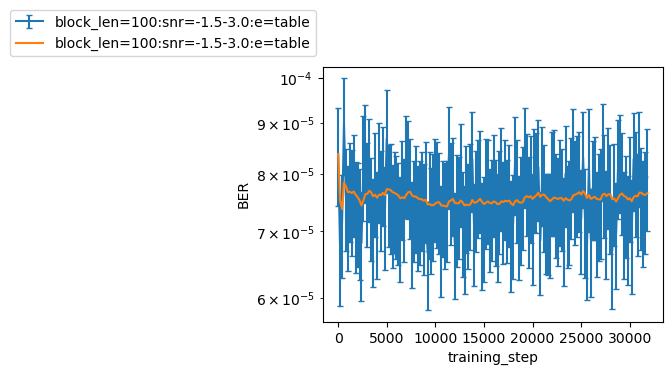

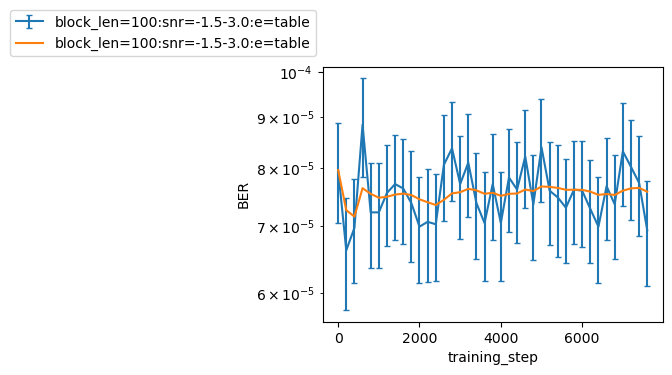

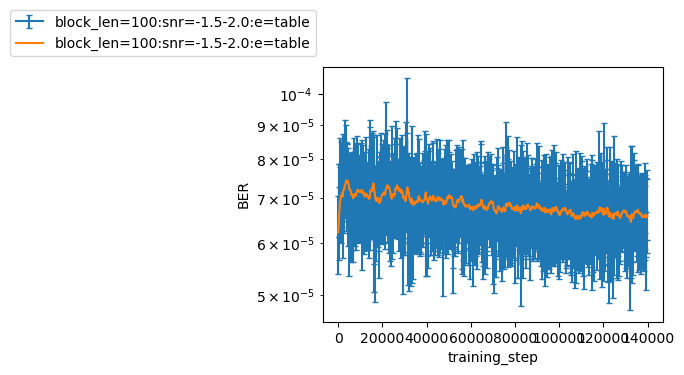

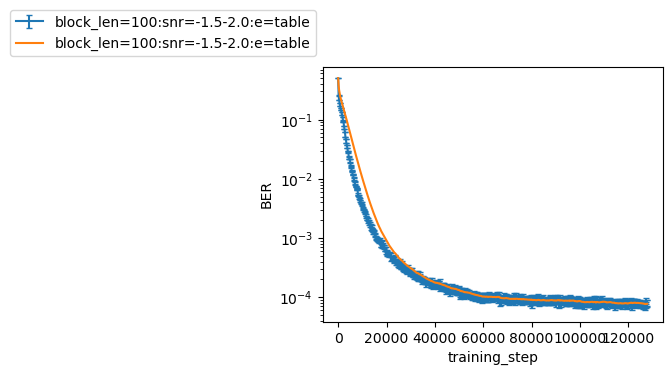

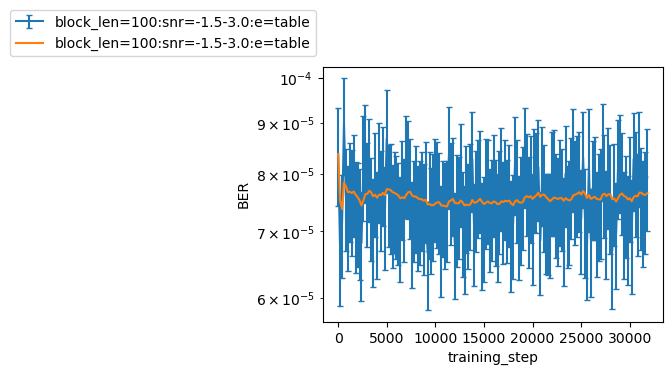

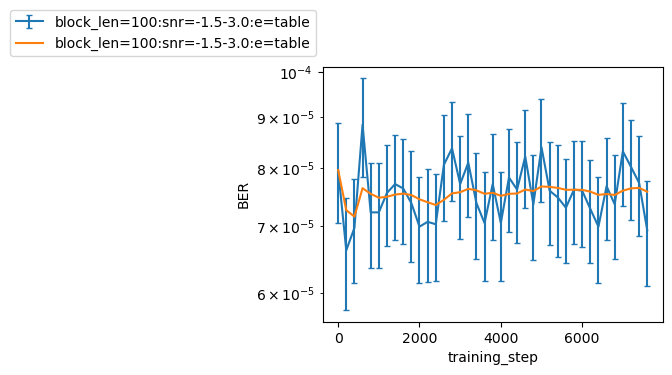

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

for (
    block_len, 
    snr_low, 
    snr_high,
    encoder_path,
    encoder_type, 
    argument_hash
    ), validation_result in validation.groupby(["block_len", "snr_low", "snr_high", "encoder_path","encoder_type", "argument_hash"]):
    fig = plt.figure(figsize=(4, 3), dpi=100)
    ax = fig.add_axes([0.1, 0.1, .85, .85])  # Last two terms control height and width
    capsize = 2
    
    ax.errorbar(
        validation_result["step"], 
        validation_result["ber__mean"], 
        yerr=validation_result["ber__err"], 
        linestyle='-',
        capsize=capsize,
        label=f"block_len={block_len}:snr={snr_low}-{snr_high}:e={encoder_type}"
    )
    ax.errorbar(
        validation_result["step"], 
        validation_result["ber__mean"].ewm(com=10.0).mean(), 
        linestyle='-',
        capsize=capsize,
        label=f"block_len={block_len}:snr={snr_low}-{snr_high}:e={encoder_type}"
    )
    ax.legend(bbox_to_anchor=[0.0, 1.25])
    ax.set_yscale('log')
    # ax.set_xscale('log')
    ax.set_xlabel('training_step')
    ax.set_ylabel('BER')

    display(fig)

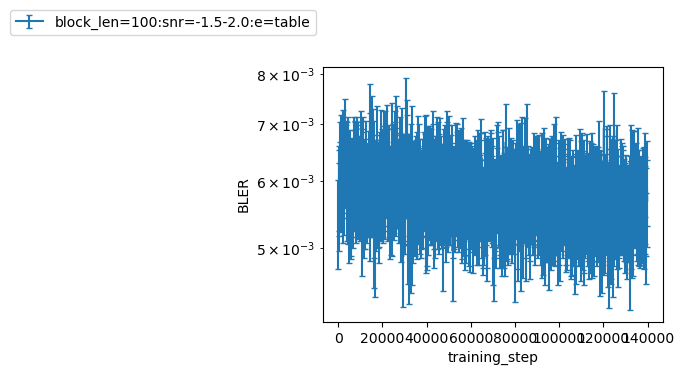

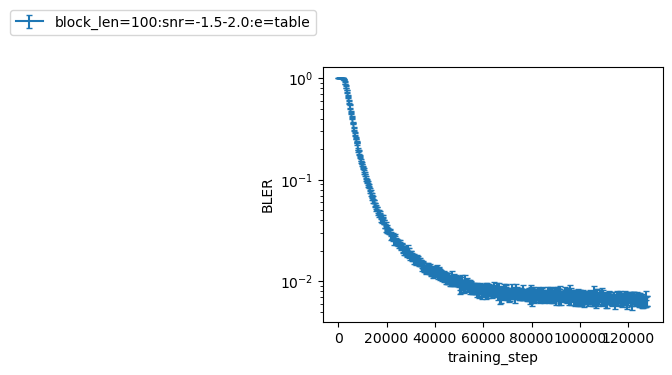

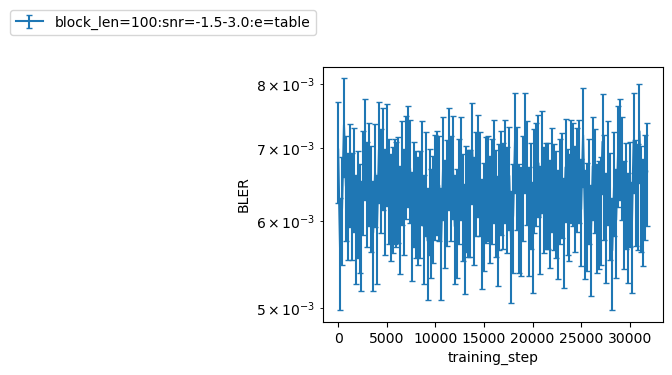

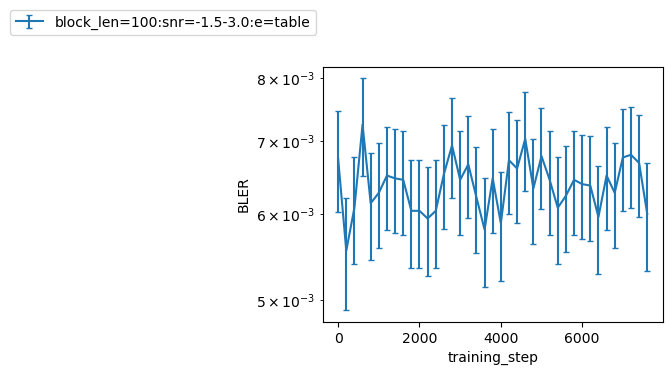

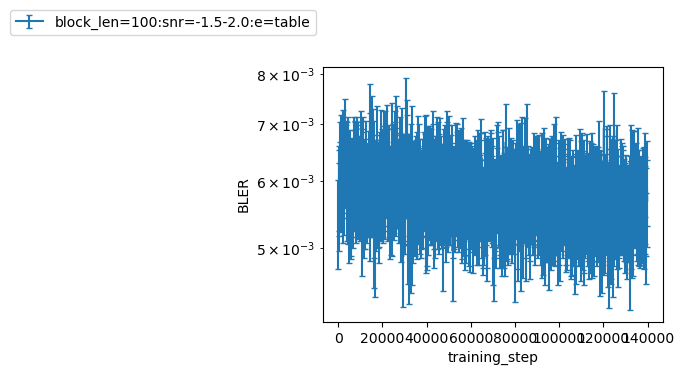

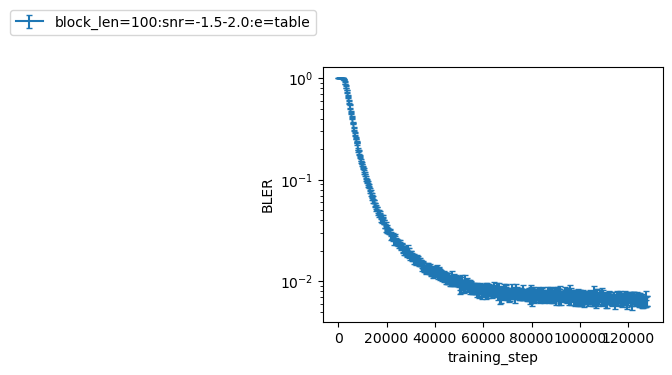

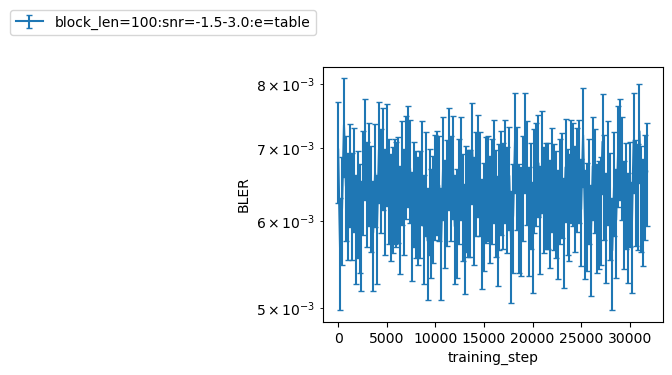

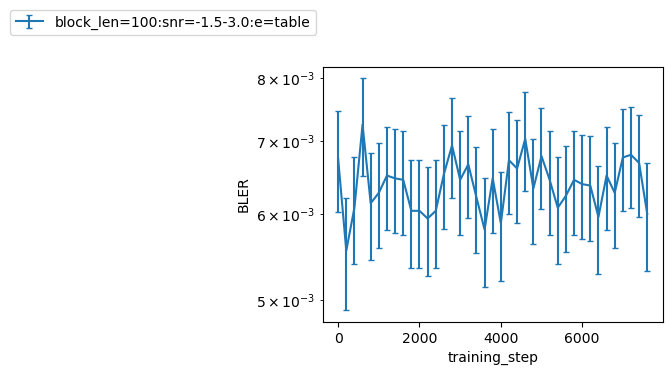

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

for (
    block_len, 
    snr_low, 
    snr_high,
    encoder_path,
    encoder_type, 
    argument_hash
    ), validation_result in validation.groupby(["block_len", "snr_low", "snr_high", "encoder_path","encoder_type", "argument_hash"]):
    fig = plt.figure(figsize=(4, 3), dpi=100)
    ax = fig.add_axes([0.1, 0.1, .85, .85])  # Last two terms control height and width
    capsize = 2
    
    ax.errorbar(
        validation_result["step"], 
        validation_result["bler__mean"], 
        yerr=validation_result["bler__err"], 
        linestyle='-',
        capsize=capsize,
        label=f"block_len={block_len}:snr={snr_low}-{snr_high}:e={encoder_type}"
    )
    ax.legend(bbox_to_anchor=[0.0, 1.25])
    ax.set_yscale('log')
    # ax.set_xscale('log')
    ax.set_xlabel('training_step')
    ax.set_ylabel('BLER')

    display(fig)